# PALM Microscopy

For this project, the PSF is supposed to be an isotropic Gaussian pulse with the same FWHM w = 2 in the two directions and maximal value a = 1. The given numerical values are dimensionless.

- ImageTest.mat: reference image for testing your algorithm.
- CoordinatesTest.mat: exact positions of the fluorophores in image ImageTest.mat.
- ImagesPALM.mat: sequence of 865 PALM images.
- BlurredImage.png: low resolution image of the pattern to reconstruct from ImagesPALM.mat sequence


## Precision analysis (1D)

### analysis of the noise

In [1]:
# Functions

from scipy.io import loadmat
import numpy as np

def load_mat(filename):

    print(f"Loading {filename}")

    filepath = f'./data/{filename}'

    # Load the .mat file
    data = loadmat(filepath)

    # Inspect the loaded data
    print(f"{data.keys()} \n")
    
    return data


# Usage example
# data = load_mat_as_float_arrays('yourfile.mat')
# print(data)




In [2]:
# Plotly

# fig = go.Figure()

    # fig.add_trace(
    #     go.Heatmap(z=f_1, colorscale="gray")
    # )

        
    # fig.update_layout(
    #     title=f"Image Test",
    #     autosize=False,
    #     #width=500,
    #     #height=500,
    #     margin=dict(l=65, r=50, b=65, t=90),
    #     yaxis=dict(autorange='reversed'),
    #     shapes=[
    #         # dict(type="line", xref="x", yref="y",
    #         #     x0=x_0, y0=y_0, x1=b, y1=a, line_width=3, line_color="red"),
    #         dict(type="rect", xref="x", yref='y',
    #             x0=332, y0=77, x1=362, y1=107, line_width=2, line_color="red", label=dict(text="        Block 1", font=dict(color="red"), textposition="top left")),
    #         dict(type="rect", xref="x", yref='y',
    #             x0=120, y0=207, x1=150, y1=237, line_width=2, line_color="red", label=dict(text="        Block 2", font=dict(color="red"), textposition="top left")),
    #         dict(type="rect", xref="x", yref='y',
    #             x0=120, y0=61, x1=150, y1=91, line_width=2, line_color="red", label=dict(text="        Block 3", font=dict(color="red"), textposition="top left")),
    #         dict(type="rect", xref="x", yref='y',
    #             x0=251, y0=163, x1=281, y1=193, line_width=2, line_color="red", label=dict(text="        Block 4", font=dict(color="red"), textposition="top left")),
    #         dict(type="rect", xref="x", yref='y',
    #             x0=408, y0=229, x1=438, y1=259, line_width=2, line_color="red", label=dict(text="        Block 5", font=dict(color="red"), textposition="top left"))
    #         # # dict(type="rect", xref="x3", yref="y3",
    #         #     x0=10, y0=20, x1=15, y1=30),
    #         # dict(type="circle", xref="x4", yref="y4",
    #         #     x0=5, y0=12, x1=10, y1=18)
    #     ]
    # )
        
    # fig.show()

    # fig = go.Figure()
    
    # fig.add_trace(
    #     go.Image(z=image)
    # )
    
    # for i in range(len(X)):
    #     fig.add_shape(type="circle",
    #     xref="x", yref="y",
    #     x0=X[i]-markerSize, y0=Y[i]-markerSize, x1=X[i]+markerSize, y1=Y[i]+markerSize,
    #     line_color="LightSeaGreen",
    #     )
        
    # fig.update_layout(
    #     title="Identification of the character",
    #     #autosize=False,
    #     #width=500,
    #     #height=500,
    #     margin=dict(l=65, r=50, b=65, t=90),
    #     #yaxis=dict(autorange='reversed')
    # )
        
    # fig.show()

Loading CoordinatesTest.mat
dict_keys(['__header__', '__version__', '__globals__', 'i_molecules', 'j_molecules']) 

Loading ImageTest.mat
dict_keys(['__header__', '__version__', '__globals__', 'ImageTest']) 



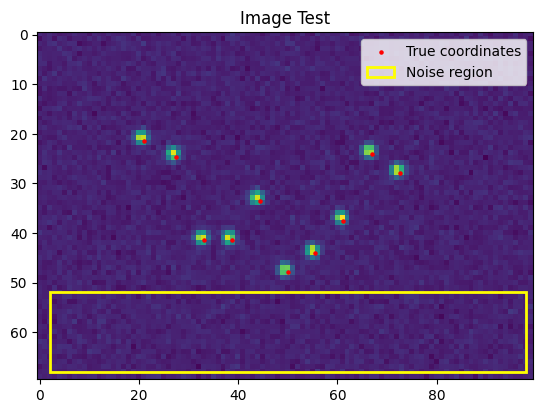

(70, 100)


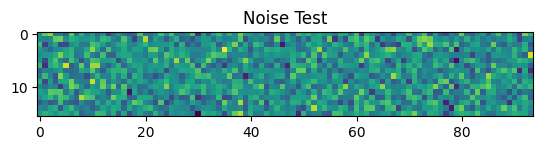

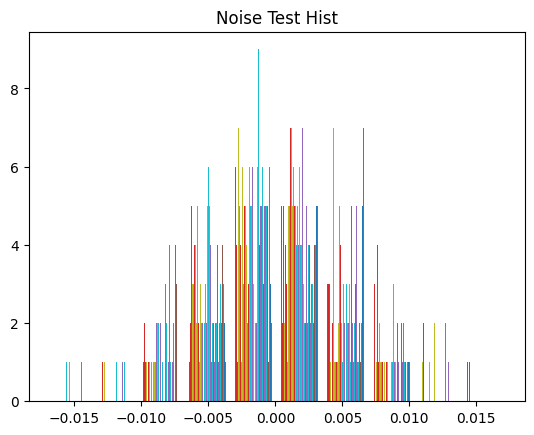

In [14]:
# Main

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def main():

    # load and print .mat data

    CoordinatesTest = load_mat('CoordinatesTest.mat')
    # ImageFloue = load_mat_as_float_arrays('ImageFloue.mat')
    # ImagesPALM = load_mat_as_float_arrays('ImagesPALM.mat')
    ImageTest = load_mat('ImageTest.mat')

    CoordinatesTest_i = CoordinatesTest["i_molecules"]
    CoordinatesTest_j = CoordinatesTest["j_molecules"]
    ImageTest = ImageTest["ImageTest"]

    plt.imshow(ImageTest)
    plt.title("Image Test")
    plt.scatter(CoordinatesTest_j, CoordinatesTest_i, s=5, c="red", marker="o", label="True coordinates")
    rect = patches.Rectangle((2, 52), 96, 16, linewidth=2, edgecolor="yellow", facecolor='none',label="Noise region")
    plt.gca().add_patch(rect)
    plt.legend()
    plt.show()
    print(ImageTest.shape)
    
    NoiseTest = ImageTest[52:68,2:96]
    plt.imshow(NoiseTest)
    plt.title("Noise Test")
    plt.show()

    plt.hist(NoiseTest)
    plt.title("Noise Test Hist")
    plt.show()

    

if __name__=="__main__":
    main()

### analysis of the CRLB
when the parameter a of the PSF is unknown, especially its variation with θ, according to the noise model (previously found)

### Expression of the ML estimator
and estimation of its bias and efficiency

### Optimal value of the PSF width w

## Implementation of the algorithm (2D)

### Algorithm for detection and rough estimation
of the position of single fluorophores in an image

### Expression and implementation of ML position estimator in 2D

### Application of the method to the proposed images and find the hidden pattern